In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("solar_energy_usage.csv")


In [3]:
df.head()

,DateTime,Solar_Radiation_Wm2,Temperature_C,Humidity_%,Wind_Speed_mps,Cloud_Cover_%,Energy_Usage_kWh
0,2023-01-01 00:00:00,437.086107,21.809066,46.154857,4.996702,72.999831,21.979208
1,2023-01-01 01:00:00,955.642876,24.203070,43.303847,7.467468,18.451200,48.016802
2,2023-01-01 02:00:00,758.794548,35.636422,32.330774,5.626668,34.663969,37.562187
3,2023-01-01 03:00:00,638.792636,20.200132,62.508667,0.833026,66.328064,28.380585
4,2023-01-01 04:00:00,240.416776,36.089491,53.363691,1.855802,48.208934,9.273466


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             5000 non-null   object 
 1   Solar_Radiation_Wm2  5000 non-null   float64
 2   Temperature_C        5000 non-null   float64
 3   Humidity_%           5000 non-null   float64
 4   Wind_Speed_mps       5000 non-null   float64
 5   Cloud_Cover_%        5000 non-null   float64
 6   Energy_Usage_kWh     5000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe() #descrptive statics

,Solar_Radiation_Wm2,Temperature_C,Humidity_%,Wind_Speed_mps,Cloud_Cover_%,Energy_Usage_kWh
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,547.148792,24.744614,55.096254,5.076847,50.877711,25.452212
std,260.670286,8.568495,20.353887,2.878062,28.874127,14.161049
min,100.010471,10.001585,20.011042,0.002525,0.004812,-9.370917
25%,319.476526,17.414377,37.301713,2.627293,25.889579,14.141275
50%,550.007763,24.579147,54.733799,5.124496,51.334038,25.390380
75%,773.290776,32.001148,73.243330,7.511056,75.769663,36.760915
max,999.745906,39.985156,89.986360,9.999248,99.990098,61.414443


In [7]:
df.isnull().sum()

DateTime               0
Solar_Radiation_Wm2    0
Temperature_C          0
Humidity_%             0
Wind_Speed_mps         0
Cloud_Cover_%          0
Energy_Usage_kWh       0
dtype: int64

[]

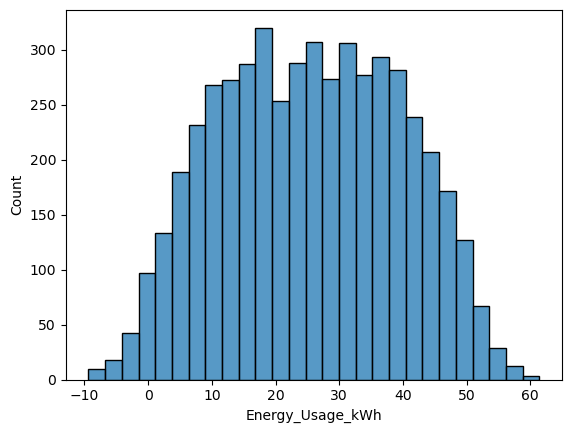

In [8]:
sns.histplot(df["Energy_Usage_kWh"])
plt.plot()

In [13]:
df.drop(columns=["DateTime"],inplace=True)

In [14]:
df.head()

,Solar_Radiation_Wm2,Temperature_C,Humidity_%,Wind_Speed_mps,Cloud_Cover_%,Energy_Usage_kWh
0,437.086107,21.809066,46.154857,4.996702,72.999831,21.979208
1,955.642876,24.203070,43.303847,7.467468,18.451200,48.016802
2,758.794548,35.636422,32.330774,5.626668,34.663969,37.562187
3,638.792636,20.200132,62.508667,0.833026,66.328064,28.380585
4,240.416776,36.089491,53.363691,1.855802,48.208934,9.273466


In [15]:
x = df.drop(columns=["Energy_Usage_kWh"])  # Features ignoring last columns 
y = df["Energy_Usage_kWh"]  # Target variable

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)



LinearRegression()

In [19]:
ypred = model.predict(xtest)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 4.0707541352983565
Mean Squared Error: 25.283274863706527
R-squared Score: 0.8733903484805189


In [22]:
model.predict([[437.086107	,21.809066	,46.154857,	4.996702,	72.999831]])

array([5597.8264995])